**Question 5: Processing grayscale images [2 Pts]<br/>**
[1 pt] Implement the histogram equalization algorithm (that we covered in the class) from scratch, show a sample
image and its histogram before and after before and after this operation.<br/>
[0.5 pt] Implement Clipping algorithm with alpha=50, b=150, and β=2. (See example operation and formulations
in Lecture 3 powerpoint.) Choose a sample grayscale image, apply the algorithm, and show the images before and
after Clipping operation. Comment on the final results with a few sentences.<br/>
[0.5 pt] Implement range compression algorithm y = clog 10 (1 + x) with c=1,10,100, and 1000, apply it to a chosen
grayscale image, and comment on the final results with a few sentences.<br/>

In [59]:
import cv2
import scipy
import numpy
import math
from matplotlib import pyplot
from PIL import Image
from pylab import *
from collections import Counter, OrderedDict
%matplotlib inline

In [18]:
I = array(Image.open('/home/srikar/CVPA1/CVV/e1.jpg'))


In [69]:
def histogram_equalization(I):
    T = numpy.empty(I.shape)
    histogram,bins = numpy.histogram(I.flatten(),256,[0,256])
    sumH = histogram.cumsum()
    size = I.shape[0]*I.shape[1]
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            T[i][j] = (max(sumH[I[i][j]], 1) - 1)*255/size
    
    plt.figure()
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

    plt.subplot(3,3,1)
    plt.title('Original Image')
    plt.imshow(I,cmap = cm.gray)
    
    plt.subplot(3,3,2)
    plt.title('Histogram Equalized image')
    plt.imshow(T,cmap = cm.gray)
    
    
    plt.subplot(3,3,3)
    plt.title('Original Histogram')
    pyplot.hist(I.ravel(), 256, [0, 256])
    
    
    
    plt.subplot(3,3,4)
    plt.title('Equalized Histogram')
    pyplot.hist(T.ravel(), 256, [0, 256])
    pyplot.show()  
            
    

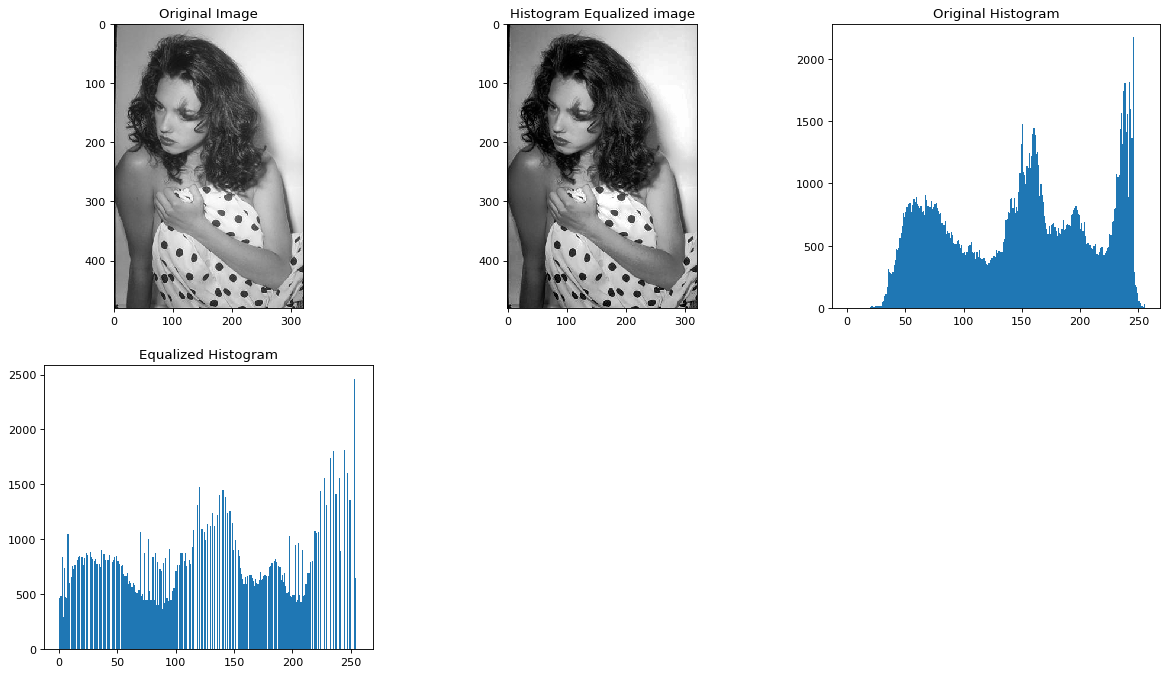

In [70]:
histogram_equalization(I)

In [67]:
a = 50
b = 150
beta = 2
def Clipping(I):
    
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i][j] >= 0 and I[i][j] < a:
                T[i][j] = 0
                
            elif I[i][j] >= a and I[i][j] < b:
                T[i][j] = beta*(I[i][j] - a)
            elif I[i][j] >= b and I[i][j] < 255:
                T[i][j] = beta*(b - a)
                
    plt.figure()
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

    plt.subplot(3,3,1)
    plt.title('Original Image')
    plt.imshow(I,cmap = cm.gray)
    
    plt.subplot(3,3,2)
    plt.title('clipped image')
    plt.imshow(T,cmap = cm.gray)
    
    pyplot.show()
                
     
                
    

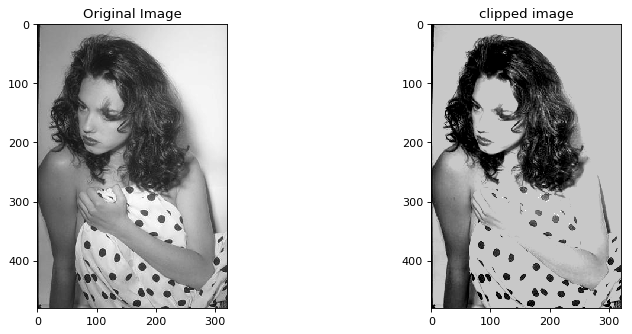

In [68]:
Clipping(I)

In [86]:
def rangeCompression(I):
    T1 = numpy.empty(I.shape)
    T2 = numpy.empty(I.shape)
    T3 = numpy.empty(I.shape)
    T4 = numpy.empty(I.shape)
    c = [1, 10, 100, 1000]
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            T1[i][j] = c[0]*math.log10(1+I[i][j])
            T2[i][j] = c[1]*math.log10(1+I[i][j])
            T3[i][j] = c[2]*math.log10(1+I[i][j])
            T4[i][j] = c[3]*math.log10(1+I[i][j])
            
               
    
    plt.figure()
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

    plt.subplot(3,3,1)
    plt.title('Original Image')
    plt.imshow(I,cmap = cm.gray)
    
    plt.subplot(3,3,1)
    plt.title('T1,c=1')
    plt.imshow(T1,cmap = cm.gray)
    
    plt.subplot(3,3,2)
    plt.title('T1,c=10')
    plt.imshow(T2,cmap = cm.gray)
    
    
    plt.subplot(3,3,3)
    plt.title('T1,c=100')
    plt.imshow(T3,cmap = cm.gray)
    
    
    
    plt.subplot(3,3,4)
    plt.title('T1,c=1000')
    plt.imshow(T4,cmap = cm.gray)
    pyplot.show()
            
    
            

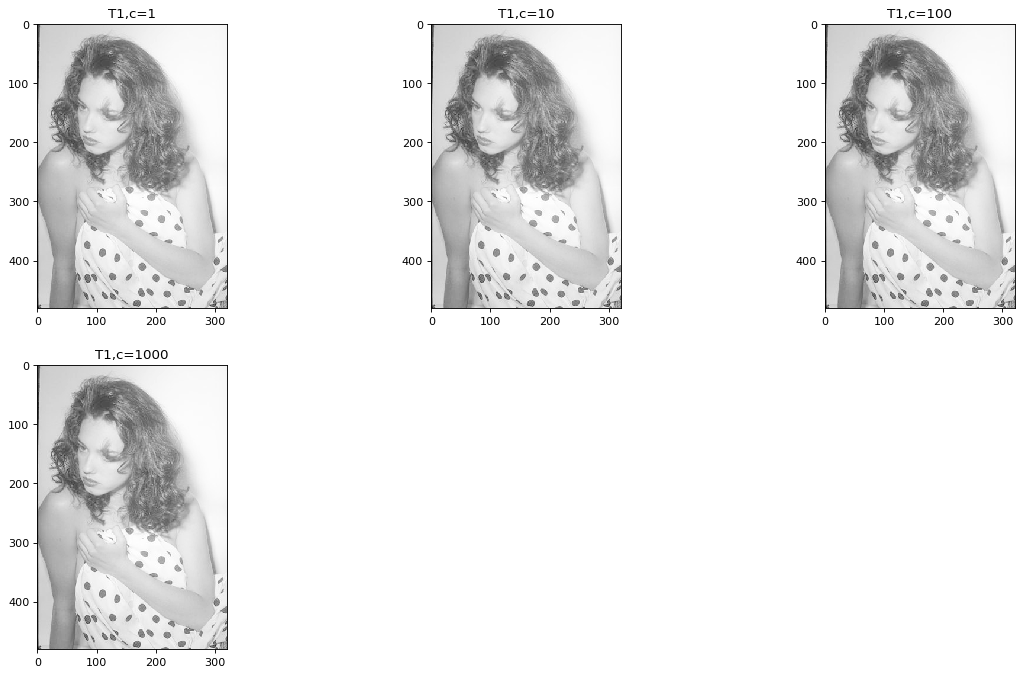

In [87]:
rangeCompression(I)